<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Teste_z_2_amos_indepen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Teste z para duas amostras independentes

* Número de amostras maior ou igual a 30.
* Necessita conhecimento do desvio padrão.

In [10]:
import numpy as np
import pandas as pd

In [11]:
enem_sp = pd.read_csv('/content/drive/MyDrive/curso estatistica/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,nao_respondeu,NaN,...,600.2,Ingles,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Ingles,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Nao
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,publica,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,publica,NaN,...,419.2,Ingles,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,nao_respondeu,NaN,...,796.1,Ingles,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo: Analisar a diferença entre as médias de dois componentes de redação do colégio y.

In [12]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [13]:
colegiox.shape

(41, 28)

In [14]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [15]:
colegiox_mulher.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,451.9,Ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Nao
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Nao
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,1,branca,1,2,publica,35017632.0,...,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,537.9,Ingles,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [16]:
colegiox_mulher.shape

(28, 28)

In [17]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [18]:
colegiox_homem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,537.1,Ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,59.5,Ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,705.3,Ingles,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


In [20]:
colegiox_homem.shape

(13, 28)

1) Analisar a classificação das variáveis

In [21]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [22]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [23]:
import plotly.express as px
import seaborn as sns

In [28]:
grafico = px.box(colegiox_mulher, y='COMP5')
grafico.show()

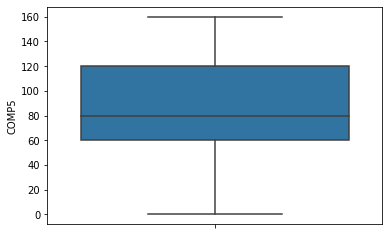

In [29]:
sns.boxplot(data=colegiox_mulher, y="COMP5");

In [30]:
grafico = px.box(colegiox_homem, y='COMP5')
grafico.show()

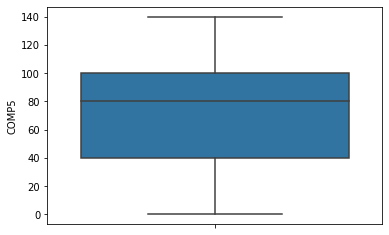

In [31]:
sns.boxplot(data=colegiox_homem, y="COMP5");

4) Analisar Normalidade

### Critérios:

##### Nível de significância de 0,05 ou 5% (Mais utilizado)

##### Quando p > 0,05 (Distribuição normal)

In [32]:
import scipy.stats as stats

In [33]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_mulher.COMP5)

ShapiroResult(statistic=0.9521203637123108, pvalue=0.2238943725824356)

In [34]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_homem.COMP5)

ShapiroResult(statistic=0.9423079490661621, pvalue=0.4874751567840576)

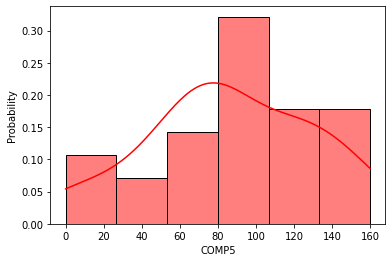

In [35]:
sns.histplot(colegiox_mulher, x='COMP5', bins=6, color='red', kde=True, stat='probability');

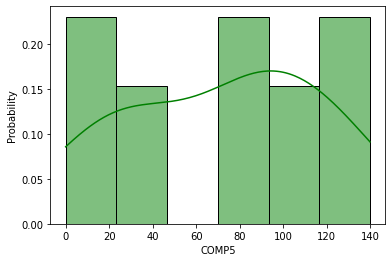

In [36]:
sns.histplot(colegiox_homem, x='COMP5', bins=6, color='green', kde=True, stat='probability');

In [37]:
import matplotlib.pyplot as plt

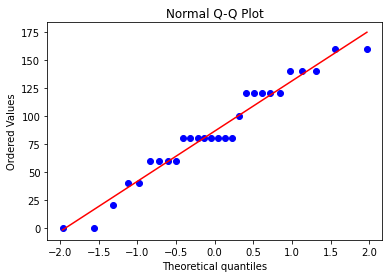

In [38]:
stats.probplot(colegiox_mulher['COMP5'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

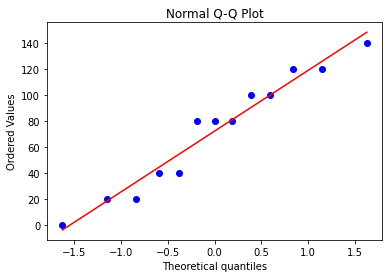

In [39]:
stats.probplot(colegiox_homem['COMP5'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

### 5) Homogenidade das variências (Homocedastidade)

#### Variabilidade dos erros constante.

##### Ho = variâncias homogêneas: p > 0.05
##### Ha = variância não homogênias: p <= 0.05

In [40]:
from scipy.stats import levene

In [43]:
stat, p = levene(colegiox_mulher.COMP5, colegiox_homem.COMP5, center='mean')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.07
p-valor: 0.7899416696


## Teste z para duas amostras

#### Comparação das médias das notas do componente 5 da redação entre homens e mulheres do colégio Y.

##### Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DE HOMENS E MULHRES: p > 0.05
###### Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DE HOMENS E MULHRES: p <= 0.05

In [42]:
from statsmodels.stats.weightstats import ztest

In [45]:
stat, p = ztest(colegiox_mulher.COMP5, colegiox_homem.COMP5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 0.96
p-valor: 0.3394918950042334


In [46]:
colegiox_mulher.COMP5.describe()

count     28.000000
mean      86.428571
std       43.903453
min        0.000000
25%       60.000000
50%       80.000000
75%      120.000000
max      160.000000
Name: COMP5, dtype: float64

In [47]:
colegiox_homem.COMP5.describe()

count     13.000000
mean      72.307692
std       44.376016
min        0.000000
25%       40.000000
50%       80.000000
75%      100.000000
max      140.000000
Name: COMP5, dtype: float64

***Interpretação***

* Teste estatístico: 0,96
* p_valor = 0,33949

Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colégio x seja diferente entre homens e mulheres.